In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
# This will prompt for authorization.
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
btc_hour = pd.read_csv('/content/drive/My Drive/Magisterka/dane_final/btc_price_2021.csv', skiprows = 1)

In [ ]:
btc_hour = btc_hour[["date", 'open', 'high', 'low', 'close', 'Volume BTC']]

In [ ]:
daty = list()
for i in range(btc_hour.shape[0]):
  try:
    daty.append(pd.to_datetime(btc_hour.date.iloc[i], format = '%Y-%m-%d %I-%p'))
  except:
    daty.append(pd.to_datetime(btc_hour.date.iloc[i]))


btc_hour['date'] = daty


In [ ]:
btc_hour = btc_hour.sort_values('date').reset_index().drop(columns = 'index')

In [ ]:
btc_hour

,date,open,high,low,close,Volume BTC
0,2017-08-17 04:00:00,16199.91,16199.91,4261.32,4308.83,44.510000
1,2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.230000
2,2017-08-17 06:00:00,4315.32,4345.45,4309.37,4324.35,7.230000
3,2017-08-17 07:00:00,4324.35,4349.99,4287.41,4349.99,4.440000
4,2017-08-17 08:00:00,4349.99,4377.85,4333.32,4360.69,0.949900
...,...,...,...,...,...,...
34860,2021-04-20 20:00:00,56572.44,57076.24,56347.84,56725.00,3872.758905
34861,2021-04-20 21:00:00,56725.01,57020.77,56424.25,57020.76,2491.567737
34862,2021-04-20 22:00:00,57020.76,57050.00,56090.00,56380.00,2308.190909
34863,2021-04-20 23:00:00,56380.00,56573.54,56177.97,56425.00,1908.144983


EXP MOVING AVERAGE

In [ ]:
def ema(t, n, ts, lag):
    '''
    n - value of lag n
    t - index of ema (ema(n)_{t})
    ts - time series of price, increasing ordered
    lag - actually calculate ema(n)_{t-lag} for observation ts_{t}
    '''
    alfa = 2/(n+1)
    weights = [(1-alfa)**i for i in range(n+1)]
    suma = sum(weights)
    weights = [i/suma for i in weights]
    return sum(ts.loc[(t-(n+1)-lag):(t-lag-1)]*weights)
    

In [ ]:
def ema_vec(t_vec, n, ts, lag):
    
    def ema_ust(t):
        return ema(t, n, ts, lag)
    
    ema_v = np.vectorize(ema_ust)
    
    
    return pd.Series(ema_v(t_vec), index = t_vec)
    

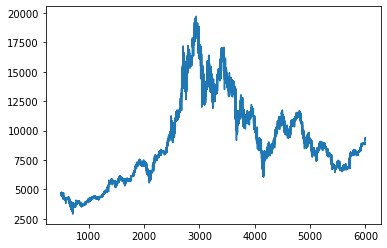

In [ ]:

plt.plot(btc_hour['open'].iloc[500:6000])

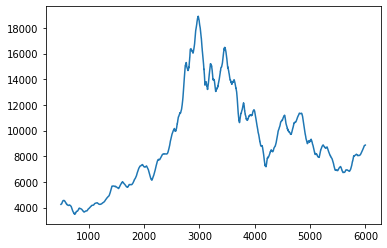

In [ ]:
plt.plot(ema_vec(list(range(500,6000)), n=60, ts=btc_hour['open'], lag=0))

SIMPLE MOVING AVERAGE

In [ ]:
def sma(t, n, ts, lag):
    '''
    n - value of lag n
    t - index of ema (ema(n)_{t})
    ts - time series of price, increasing ordered
    lag - actually calculate ema(n)_{t-lag} for observation ts_{t}
    '''
    weights = [1/n]*n
    return sum(ts.loc[(t-(n)-lag):(t-lag-1)]*weights)
    

In [ ]:
def sma_vec(t_vec, n, ts, lag):
    
    def sma_ust(t):
        return sma(t, n, ts, lag)
    
    sma_v = np.vectorize(sma_ust)
    
    return pd.Series(sma_v(t_vec), index = t_vec)
    

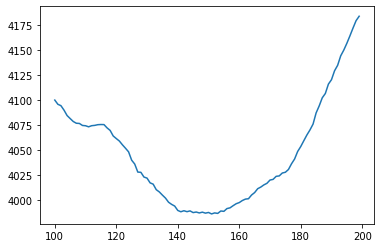

In [ ]:
plt.plot(sma_vec(list(range(100,200)), n=60, ts=btc_hour['open'], lag=0))

SIMPLE MOVING AVERAGE PRICE SUBTRACTION

In [ ]:
def smaps(t, n, ts, lag):
    return sma(t, n, ts, lag) - ts.loc[t-lag]

In [ ]:
smaps(40, 10,ts=btc_hour['open'], lag=3)

218.7090000000003

In [ ]:
def smaps_vec(t_vec, n, ts, lag):
    return pd.Series((np.asarray(sma_vec(t_vec, n, ts, lag)) - np.asarray(ts.loc[[i-lag for i in t_vec]])),index = t_vec)

In [ ]:
smaps_vec(list(range(500,6000)), n=60, ts=btc_hour['open'], lag=3)

500    -310.973167
501     -47.936500
502    -230.188667
503    -272.245333
504    -344.131833
           ...    
5995   -301.034667
5996   -506.948500
5997   -302.948000
5998   -371.752667
5999   -293.830667
Length: 5500, dtype: float64

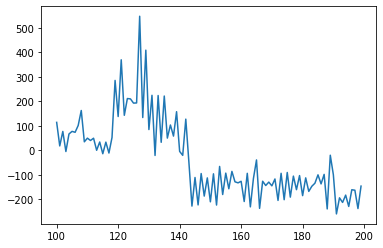

In [ ]:
plt.plot(smaps_vec(list(range(100,200)), n=60, ts=btc_hour['open'], lag=3))
plt.show()

SIMPLE MOVING AVERAGE SUBTRACTION (GOLDEN AND DEATH CROSS)

In [ ]:
def smas(t, n, m, ts, lag):
    if n<m:
        raise Exception("n should be greater than m")
    else:
        return sma(t, n, ts, lag) - sma(t, m, ts, lag)

def smas_vec(t_vec, n, m, ts, lag):
    if n<m:
        raise Exception("n should be greater than m")
    else: 
        return sma_vec(t_vec, n, ts, lag) - sma_vec(t_vec, m, ts, lag)

In [ ]:
smas_vec(list(range(500,6000)), n=60,m=20, ts=btc_hour['open'], lag=3)

500    -213.826167
501    -208.369000
502    -202.143167
503    -194.817833
504    -200.173333
           ...    
5995    -21.217667
5996    -33.104000
5997    -46.153500
5998    -57.192167
5999    -67.499667
Length: 5500, dtype: float64

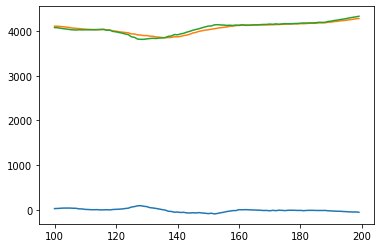

In [ ]:
plt.plot(smas_vec(list(range(100,200)), n=20,m=12, ts=btc_hour['open'], lag=0))
plt.plot(sma_vec(list(range(100,200)), n=20, ts=btc_hour['open'], lag=0))
plt.plot(sma_vec(list(range(100,200)), n=12, ts=btc_hour['open'], lag=0))

MOVING AVERAGE CONVERGENCE DIVERGENCE (MACD)

In [ ]:
def macd(t, ts, lag):
   
    return ema(t, 26, ts, lag) - ema(t, 12, ts, lag)

def macd_vec(t_vec, ts, lag):
   
    mac = ema_vec(t_vec, 26, ts, lag) - ema_vec(t_vec, 12, ts, lag)
    mac_df = pd.DataFrame(columns = ['macd'], index = t_vec)
    mac_df['macd'] = mac
    return mac_df['macd']

def macdss_vec(t_vec, ts, lag):
    
    mac = macd_vec(list(range(min(t_vec)-10-lag, (max(t_vec)+1))), ts,lag)
    sl = ema_vec(t_vec, 9, mac ,0)
    return mac.loc[t_vec]-sl.loc[t_vec]

RSI

In [ ]:
lag = 0
ts_c = btc_hour['close']
ts_o = btc_hour['open']
n=10
t=20

In [ ]:
def rsi(t, n, ts_c, ts_o, lag):
    
    g = sum(((ts_c.loc[(t-n+1-lag):(t-lag)] / ts_o.loc[(t-n+1-lag):(t-lag)])-1)*(ts_o.loc[(t-n+1-lag):(t-lag)] < ts_c.loc[(t-n+1-lag):(t-lag)]))
    l = sum((1-(ts_c.loc[(t-n+1-lag):(t-lag)] / ts_o.loc[(t-n+1-lag):(t-lag)]))*(ts_o.loc[(t-n+1-lag):(t-lag)] > ts_c.loc[(t-n+1-lag):(t-lag)]))
    if l!=0:
        rs = g/l
    else:
        return 100
    if rs!= -1:
        return 100-(100/(1+rs))
    else: 
        return 0

In [ ]:
def rsi_vec(t_vec, n, ts_c, ts_o, lag):
    
    def rsi_ust(t):
        return rsi(t, n, ts_c, ts_o, lag)
    
    rsi_v = np.vectorize(rsi_ust)
    
    return pd.Series(rsi_v(t_vec), index = t_vec)

In [ ]:
rsi(5000, n, ts_c, ts_o, 20)

57.41015412729542

In [ ]:
rsi_vec(list(range(30,52)), n, ts_c, ts_o, lag)

30    28.559454
31    27.784315
32    26.999901
33    34.788839
34    27.178443
35    20.439213
36    24.854801
37    19.816000
38    24.323833
39    46.957746
40    48.531570
41    55.979594
42    54.084048
43    51.539316
44    51.785346
45    60.400826
46    58.923721
47    68.447189
48    58.013315
49     6.042455
50     4.719435
51    14.890627
dtype: float64

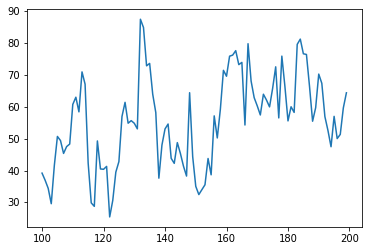

In [ ]:
plt.plot(rsi_vec(list(range(100,200)), n, ts_c, ts_o, lag))


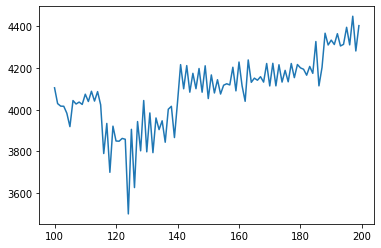

In [ ]:
ts = btc_hour['open']
plt.plot(ts.loc[list(range(100,200))])

STOCHASTIC OSCILLATOR

In [ ]:
n = 5
ts_c = btc_hour['close']
ts_h = btc_hour['high']
ts_l = btc_hour['low']

In [ ]:
def k_perc(t, n, ts_c, ts_l, ts_h, lag):
    if (max(ts_h.loc[t-n-lag:t-lag])-min(ts_l.loc[t-n-lag:t-lag]))!=0:
        return (ts_c.loc[t-lag]-min(ts_l.loc[t-n-lag:t-lag]))/(max(ts_h.loc[t-n-lag:t-lag])-min(ts_l.loc[t-n-lag:t-lag]))*100
    else:
        return 100
    

In [ ]:
k_perc(20, n, ts_c, ts_l, ts_h, 10)

80.78520441271868

In [ ]:
def k_perc_vec(t_vec, n, ts_c, ts_l, ts_h, lag):
    
    def k_perc_ust(t):
        return k_perc(t, n, ts_c, ts_l, ts_h, lag)
    
    k_perc_v = np.vectorize(k_perc_ust)
    
    return pd.Series(k_perc_v(t_vec), index = t_vec)

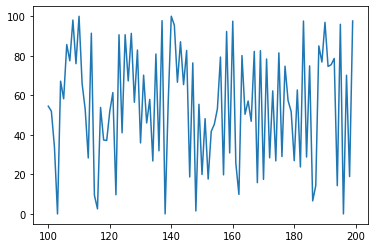

In [ ]:
plt.plot(k_perc_vec(list(range(100,200)), n, ts_c, ts_l, ts_h, lag))

In [ ]:
t_vec = list(range(40,200))

In [ ]:
def d_perc_vec(t_vec, n, ts_c, ts_l, ts_h, lag):
    
    k = k_perc_vec(list(range(min(t_vec)-lag-4,max(t_vec))), n, ts_c, ts_l, ts_h, lag)
    return sma_vec(t_vec, 3, k ,0)

In [ ]:
def k_perc_d_vec(t_vec, n, ts_c, ts_l, ts_h, lag):
    return (k_perc_vec(t_vec, n, ts_c, ts_l, ts_h, lag) - d_perc_vec(t_vec, n, ts_c, ts_l, ts_h, lag)).loc[t_vec]

ROC

In [ ]:
def roc(t, n, ts_c, lag):
    return (ts_c.loc[t-lag]-ts_c.loc[t-n-lag])/ts_c.loc[t-n-lag]*100

In [ ]:
roc(590, n, ts_c, lag)

-6.355396881843185

In [ ]:
def roc_vec(t_vec, n, ts_c, lag):
    
    def roc_ust(t):
        return roc(t, n, ts_c, lag)
    
    roc_v = np.vectorize(roc_ust)
    
    return(pd.Series(roc_v(t_vec), index = t_vec))

In [ ]:
roc_vec(t_vec, n, ts_c, lag)

40     7.938107
41    -4.548633
42     7.818517
43    -0.454284
44     0.845457
         ...   
195    1.915801
196   -0.556562
197    2.078285
198   -2.085400
199    3.230477
Length: 160, dtype: float64

MFI - money flow index

In [ ]:
def mfi(t, n, ts_c, ts_l, ts_h, ts_v, lag):
    tp = pd.Series([(ts_h.loc[t-i-lag]+ts_l.loc[t-i-lag]+ts_c.loc[t-i-lag])/3 for i in list(range(n+1))[::-1]], index = list(range(t-n,t+1)))
    rmf = tp*ts_v[t-lag-n:t-lag+1]
    ip_t = pd.Series(np.array(rmf.loc[t-lag-n+1:t-lag])>np.array(rmf.loc[t-lag-n:t-lag-1]), index = list(range(t-lag-n+1,t-lag+1)))
    in_t = pd.Series(np.array(rmf.loc[t-lag-n+1:t-lag])<np.array(rmf.loc[t-lag-n:t-lag-1]), index = list(range(t-lag-n+1,t-lag+1)))
    if sum(rmf[1:]*in_t)!=0:
      mfr = sum(rmf[1:]*ip_t)/sum(rmf[1:]*in_t)
    else:
      mfr = 100000000
    return 100 - 100/(1+mfr)

In [ ]:
ts_v = btc_hour['Volume BTC']
mfi(5600, n, ts_c, ts_l, ts_h, ts_v, lag)

70.52874178632065

In [ ]:
def mfi_vec(t_vec, n, ts_c, ts_l, ts_h, ts_v, lag):
    
    def mfi_ust(t):
        return mfi(t, n, ts_c, ts_l, ts_h, ts_v, lag)
    
    mfi_v = np.vectorize(mfi_ust)
    
    return pd.Series(mfi_v(t_vec), index = t_vec)

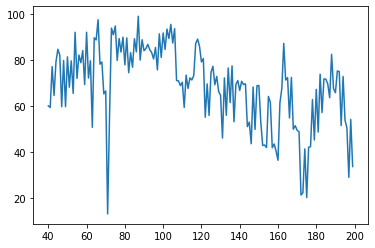

In [ ]:
plt.plot(mfi_vec(t_vec, n, ts_c, ts_l, ts_h, ts_v, lag))

CCI - commodity channel index

In [ ]:
def cci(t, n, ts_c, ts_l, ts_h, lag):
    tp = pd.Series([(ts_h.loc[t-i-lag]+ts_l.loc[t-i-lag]+ts_c.loc[t-i-lag])/3 for i in list(range(n))[::-1]], index = list(range(t-n+1,t+1)))
    stp = 1/n*sum(tp)
    return (tp.loc[t]-stp)/(0.015*1/n*sum(abs(tp-stp)))

In [ ]:
cci(t, n, ts_c, ts_l, ts_h, lag)

-115.49431721608737

In [ ]:
def cci_vec(t_vec, n, ts_c, ts_l, ts_h, lag):
    
    def cci_ust(t):
        return cci(t, n, ts_c, ts_l, ts_h, lag)
    
    cci_v = np.vectorize(cci_ust)
    
    return cci_v(t_vec)

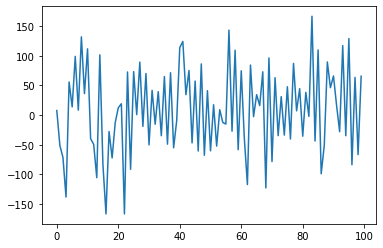

In [ ]:
plt.plot(cci_vec(list(range(100,200)), n, ts_c, ts_l, ts_h, lag))

LWI - Larry Williams %R

In [ ]:
def lwi(t, n, ts_c, ts_l, ts_h, lag):
    if (max(ts_h.loc[t-n-lag+1:t-lag])-min(ts_l.loc[t-n-lag+1:t-lag])) == 0:
        return (max(ts_h.loc[t-n-lag+1:t-lag])-ts_c.loc[t-lag]>0)*100 - (max(ts_h.loc[t-n-lag+1:t-lag])-ts_c.loc[t-lag]<0)*100
    else:
        return -(max(ts_h.loc[t-n-lag+1:t-lag])-ts_c.loc[t-lag])/(max(ts_h.loc[t-n-lag+1:t-lag])-min(ts_l.loc[t-n-lag+1:t-lag]))*100

In [ ]:
lwi(t, n, ts_c, ts_l, ts_h, lag)

-68.93209419009058

In [ ]:
def lwi_vec(t_vec, n, ts_c, ts_l, ts_h, lag):
    
    def lwi_ust(t):
        return lwi(t, n, ts_c, ts_l, ts_h, lag)
    
    lwi_v = np.vectorize(lwi_ust)
    
    return lwi_v(t_vec)

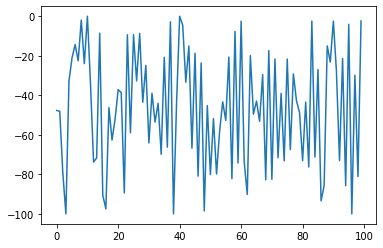

In [ ]:
plt.plot(lwi_vec(list(range(100,200)), n, ts_c, ts_l, ts_h, lag))

PRZYGOTOWANIE DANYCH

zakres danych: 2017-08-30 to 2019-03-29

In [ ]:
btc_hour.loc[(btc_hour['date']>'2019-02-01')]


,date,open,high,low,close,Volume BTC
12785,2019-02-01 01:00:00,3430.74,3432.03,3401.20,3412.75,1757.340000
12786,2019-02-01 02:00:00,3412.75,3421.49,3403.02,3416.25,1124.770000
12787,2019-02-01 03:00:00,3416.25,3423.24,3410.00,3418.50,630.240000
12788,2019-02-01 04:00:00,3418.50,3420.24,3411.00,3415.84,783.400000
12789,2019-02-01 05:00:00,3415.84,3422.00,3414.35,3419.81,625.570000
...,...,...,...,...,...,...
34860,2021-04-20 20:00:00,56572.44,57076.24,56347.84,56725.00,3872.758905
34861,2021-04-20 21:00:00,56725.01,57020.77,56424.25,57020.76,2491.567737
34862,2021-04-20 22:00:00,57020.76,57050.00,56090.00,56380.00,2308.190909
34863,2021-04-20 23:00:00,56380.00,56573.54,56177.97,56425.00,1908.144983


In [ ]:
t_vec = list(range(12785,34865))
ts = btc_hour['open']
ts_c = btc_hour['close']
ts_h = btc_hour['high']
ts_o = btc_hour['open']
ts_l = btc_hour['low']
ts_v = btc_hour['Volume BTC']
lag = 1
n=12


In [ ]:
df = btc_hour.loc[t_vec,:]

In [ ]:
df

,date,open,high,low,close,Volume BTC
12785,2019-02-01 01:00:00,3430.74,3432.03,3401.20,3412.75,1757.340000
12786,2019-02-01 02:00:00,3412.75,3421.49,3403.02,3416.25,1124.770000
12787,2019-02-01 03:00:00,3416.25,3423.24,3410.00,3418.50,630.240000
12788,2019-02-01 04:00:00,3418.50,3420.24,3411.00,3415.84,783.400000
12789,2019-02-01 05:00:00,3415.84,3422.00,3414.35,3419.81,625.570000
...,...,...,...,...,...,...
34860,2021-04-20 20:00:00,56572.44,57076.24,56347.84,56725.00,3872.758905
34861,2021-04-20 21:00:00,56725.01,57020.77,56424.25,57020.76,2491.567737
34862,2021-04-20 22:00:00,57020.76,57050.00,56090.00,56380.00,2308.190909
34863,2021-04-20 23:00:00,56380.00,56573.54,56177.97,56425.00,1908.144983


In [ ]:
%%time
for lag in [1]:
    #ema, sma
    for n in [12, 24, 30, 50, 100, 200]:
        df['ema_n'+str(n)+'_l'+str(lag)] = ema_vec(t_vec, n, ts, lag)
        df['sma_n'+str(n)+'_l'+str(lag)] = sma_vec(t_vec, n, ts, lag)
        df['smaps_n'+str(n)+'_l'+str(lag)] = smaps_vec(t_vec, n, ts, lag)

    df['smas_n200_m50_l'+str(lag)] = smas_vec(t_vec, 200, 50, ts, lag)
    df['macdss_l'+str(lag)] = macdss_vec(t_vec, ts, lag)

    for n in [14, 24, 36, 48]:
        df['rsi_n'+str(n)+'_l'+str(lag)] = rsi_vec(t_vec, n, ts_c, ts_o, lag)
        df['k_perc_n'+str(n)+'_l'+str(lag)] = k_perc_vec(t_vec, n, ts_c, ts_l, ts_h, lag)
        df['k_perc_d_n'+str(n)+'_l'+str(lag)] = k_perc_d_vec(t_vec, n, ts_c, ts_l, ts_h, lag)
        df['cci_n'+str(n)+'_l'+str(lag)] = cci_vec(t_vec, n, ts_c, ts_l, ts_h, lag)
        df['lwi_n'+str(n)+'_l'+str(lag)] = lwi_vec(t_vec, n, ts_c, ts_l, ts_h, lag)

    for n in [10, 12, 20, 48, 100]:
        df['roc_n'+str(n)+'_l'+str(lag)] = roc_vec(t_vec, n, ts_c, lag)
        
    df['volume_l'+str(lag)] = pd.Series(list(btc_hour['Volume BTC'].loc[[i-lag for i in t_vec]]), index = t_vec)





CPU times: user 8min 6s, sys: 4.98 s, total: 8min 11s
Wall time: 8min 8s


In [ ]:
df = df.drop(columns = ['high', 'close', 'low', ])

In [ ]:
df.to_csv('/content/drive/My Drive/Magisterka/dane_final/df_transformed_2021.csv', index=False)

In [ ]:
daty = list()
for i in range(df.shape[0]):
  try:
    daty.append(pd.to_datetime(df.date.iloc[i], format = '%Y-%m-%d %I-%p'))
  except:
    daty.append(pd.to_datetime(df.date.iloc[i]))


df['date'] = daty

In [ ]:
df

,date,open,Volume BTC,ema_n12_l1,sma_n12_l1,smaps_n12_l1,ema_n24_l1,sma_n24_l1,smaps_n24_l1,ema_n30_l1,sma_n30_l1,smaps_n30_l1,ema_n50_l1,sma_n50_l1,smaps_n50_l1,ema_n100_l1,sma_n100_l1,smaps_n100_l1,ema_n200_l1,sma_n200_l1,smaps_n200_l1,smas_n200_m50_l1,macdss_l1,rsi_n14_l1,k_perc_n14_l1,k_perc_d_n14_l1,cci_n14_l1,lwi_n14_l1,rsi_n24_l1,k_perc_n24_l1,k_perc_d_n24_l1,cci_n24_l1,lwi_n24_l1,rsi_n36_l1,k_perc_n36_l1,k_perc_d_n36_l1,cci_n36_l1,lwi_n36_l1,rsi_n48_l1,k_perc_n48_l1,k_perc_d_n48_l1,cci_n48_l1,lwi_n48_l1,roc_n10_l1,roc_n12_l1,roc_n20_l1,roc_n48_l1,roc_n100_l1,volume_l1
12784,2019-02-01 01-AM,3430.74,1757.340000,3449.260416,3445.274167,17.464167,3446.649397,3448.626667,20.816667,3446.153126,3447.321333,19.511333,3435.805142,3442.4702,14.6602,3453.301245,3442.9233,15.1133,3530.600356,3502.90670,75.09670,60.43650,3.132177,49.763042,26.732955,-15.821233,-52.176867,-73.267045,43.994343,26.732955,-34.734154,-55.198715,-73.267045,47.291364,49.480901,-11.986207,-46.999145,-50.519099,53.136951,52.329020,-11.460617,-39.819122,-50.519099,0.097255,0.379311,0.251385,1.281927,-3.457166,1748.380000
12785,2019-02-01 01-PM,3461.12,916.660000,3445.130682,3445.233333,14.493333,3449.952979,3448.566667,17.826667,3446.996555,3446.458333,15.718333,3437.783350,3442.8286,12.0886,3450.915721,3441.6143,10.8743,3530.079258,3502.37875,71.63875,59.55015,6.647157,42.121730,13.125000,-33.432765,-142.429834,-86.875000,41.849021,13.125000,-42.908484,-130.052689,-86.875000,43.716179,25.122429,-38.493704,-124.838471,-74.877571,49.575868,25.122429,-40.615346,-117.585333,-74.877571,-0.878018,-1.835717,-1.517032,0.262058,-3.777564,1757.340000
12786,2019-02-01 02-AM,3412.75,1124.770000,3448.247878,3441.711667,-19.408333,3451.771640,3446.484583,-14.635417,3446.304913,3446.540333,-14.579667,3439.049010,3442.7604,-18.3596,3448.342690,3440.5018,-20.6182,3529.886254,3501.68730,40.56730,58.92690,1.296741,46.172606,77.988636,35.389205,117.875475,-22.011364,43.130345,77.988636,34.141111,88.056765,-22.011364,46.723513,81.028404,25.599086,92.372355,-18.971596,50.536921,81.028404,24.493447,89.668376,-18.971596,0.647716,1.035151,0.968119,0.318317,-2.281432,916.660000
12787,2019-02-01 02-PM,3469.83,871.970000,3443.469615,3444.752500,32.002500,3449.013320,3447.463750,34.713750,3447.876032,3446.702000,33.952000,3439.413450,3444.2764,31.5264,3446.200974,3439.5058,26.7558,3529.325056,3501.32235,88.57235,57.04595,8.081559,46.169903,17.102273,-22.179924,-142.327928,-82.897727,44.468727,17.102273,-22.179924,-127.305347,-82.897727,46.588770,28.550441,-23.326804,-126.239492,-71.449559,49.601125,28.550441,-24.276177,-124.665263,-71.449559,-0.821876,-0.776362,-1.441059,0.047443,-4.306723,1124.770000
12788,2019-02-01 03-AM,3416.25,630.240000,3446.617122,3439.434167,-30.395833,3449.696894,3444.967917,-24.862083,3446.862439,3445.962333,-23.867667,3441.788631,3444.6364,-25.1936,3443.430298,3437.9808,-31.8492,3529.088259,3500.57770,30.74770,55.94130,6.151059,41.970041,74.772727,38.700758,125.783584,-25.227273,46.617472,74.772727,38.700758,90.887824,-25.227273,46.918030,78.256611,33.356187,89.737950,-21.743389,48.776984,78.256611,33.356187,89.525712,-21.743389,0.728078,0.565627,1.161298,0.131410,-2.191453,871.970000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34860,2021-04-20 20:00:00,56572.44,3872.758905,55081.448382,55415.563333,-839.416667,55347.790902,55431.475833,-823.504167,55794.252565,55571.792000,-683.188000,55951.967976,55872.3070,-382.6730,59205.714272,57827.8116,1572.8316,61100.499766,60045.71670,3790.73670,4173.40970,-306.295250,61.206795,93.929387,9.903601,117.755550,-6.070613,55.793842,93.929387,13.456983,126.529947,-6.070613,50.527672,77.259850,14.351478,76.642856,-22.740150,53.877381,77.259850,14.351478,61.173978,-22.740150,3.066689,3.973254,0.581810,2.579202,-6.563927,3592.814650
34861,2021-04-20 21:00:00,56725.01,249